<a href="https://colab.research.google.com/github/Abir-Reza/MachineLearning_with_Tensorflow/blob/master/fashionMnist_DataSet%26_Exploration_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)


2.4.1


#Load dataset by calling API
Fasion Mnist data is available in tf.keras.datasets API.

In [3]:
mnist = tf.keras.datasets.fashion_mnist

Calling **load_data** function on this object will give you **two sets** of **two lists**, these will be the **training** and **testing values** for the graphics that contain the clothing items and their labels.

In [5]:
(training_images,training_labels),(test_images,test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


#Visualize the data

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

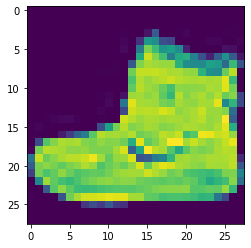

In [6]:
import numpy as np
#np.set_printoptions(linewidth =200)

import matplotlib.pyplot as plt

i =0

print(training_labels[i]) # prints the classification number of label.
print(training_images[i]) # shows 2-D matrix containing values of every pixel.
plt.imshow(training_images[i])  # Shows the image at 'ith' position of the dataset.

#**Normalize** the values from range [0-255] to [0 - 1]

In [7]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

# Construct Model

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])



**Sequential:** That defines a SEQUENCE of layers in the neural network

**Flatten:** Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a **1 dimensional set**.

**Dense:** Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

**Relu** effectively means "If **X>0** return **X**, **else return 0**" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

#Optimize Model

In [9]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6374 - accuracy: 0.7794
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3769 - accuracy: 0.8652
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3392 - accuracy: 0.8761
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3113 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2949 - accuracy: 0.8902


In [10]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3544 - accuracy: 0.8742


[0.354444295167923, 0.8741999864578247]

#Exploration Exercises

**Exercise 1:**

It creates a ***set of classifications*** for each of the ***test images***, and then ***prints the first entry*** in the classifications. The output, after run is a list of numbers.

In [11]:
classifications = model.predict(test_images)

print(classifications[0])

[2.5911580e-05 7.9265277e-08 3.1488191e-05 5.2236567e-07 9.4456818e-06
 1.2713955e-02 7.6173194e-05 7.3181517e-02 9.4300791e-05 9.1386658e-01]


#What does this list represent?

In the Fasion Mnist dataset, there are 10 classes.
It's the **probability** that this item is each of the **10 classes**.

Here the highest probability is class 9. So the item is in class number 9 (ankle boot).

In [12]:
print(test_labels[0])

9


#Exercise 2:
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?

In [14]:
import tensorflow as tf

#Load Dataset. This time we are working with mnist dataset, which contain hand written digits.

mnist = tf.keras.datasets.mnist

(training_images,training_labels), (test_images,test_labels) = mnist.load_data()

#normalize the data
training_images = training_images/255
test_images = test_images/255

#Build model
model = tf.keras.models.Sequential(
    [tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation= tf.nn.softmax)])

#Model Optimize
model.compile( optimizer= 'adam', loss = 'sparse_categorical_crossentropy')

# model fit/train with epochs
model.fit(training_images,training_labels,epochs= 5)

#model evaluate
model.evaluate(test_images,test_labels)

#predict
classifications = model.predict(test_images)

print(classifications[0])

#lebel of 0 number item. 
print(test_labels[0])






Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4311
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1184
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0801
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0573
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0734
[2.8804225e-08 3.6021923e-09 2.7737937e-05 4.7286390e-03 9.5595432e-10
 7.6118619e-07 9.1131410e-13 9.9521977e-01 1.0419959e-06 2.2129017e-05]
7


7


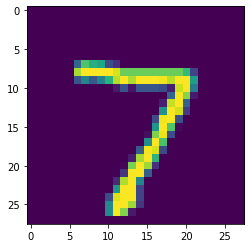

In [19]:
print(test_labels[0])

plt.imshow(test_images[0])


If we increase the layers or increase neurons in hidden layers, **Training takes longer**, but is **more accurate**.